# Sameer HANS & Emerson CARDOSO

# 1. Qubit States

We will start by understanding how to represent and write down qubit states. 

First, we need to import all the tools we will need:

In [ ]:
pip install qiskit


In [ ]:
pip install pylatexenc

In [1]:
from qiskit import QuantumCircuit, assemble, Aer, BasicAer, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi
sim = Aer.get_backend('aer_simulator')

The fundamental unit of Qiskit is the quantum circuit. The basic element needed for your first program is the QuantumCircuit. We begin by creating a QuantumCircuit comprised of 1 qubit.  
In Qiskit, we use the `QuantumCircuit` object to store our circuits, this is essentially a list of the quantum operations on our circuit and the qubits they are applied to.

In [2]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In our quantum circuits, our qubits always start out in the state $|0\rangle$. We can use the `initialize()` method to transform this into any state. We give `initialize()` the vector we want in the form of a list, and tell it which qubit(s) we want to initialize in this state:

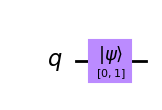

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('mpl')  # Let's view our circuit

We can then use one of Qiskit’s simulators to view the resulting state of our qubit.

In [4]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

To get the results from our circuit, we use run to execute our circuit, giving the circuit and the backend as arguments. We then use .result() to get the result of this:

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

From `result`, we can then get the final statevector using `.get_statevector()`:

In [6]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


**Note:** Python uses `j` to represent $i$ in complex numbers. We see a vector with two complex elements: `0.+0.j` = 0, and `1.+0.j` = 1.

Let’s now measure our qubit as we would in a real quantum computer and see the result:

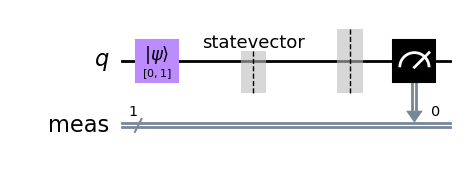

In [7]:
qc.measure_all()
qc.draw('mpl')

This time, instead of the statevector we will get the counts for the `0` and `1` results using `.get_counts()`:

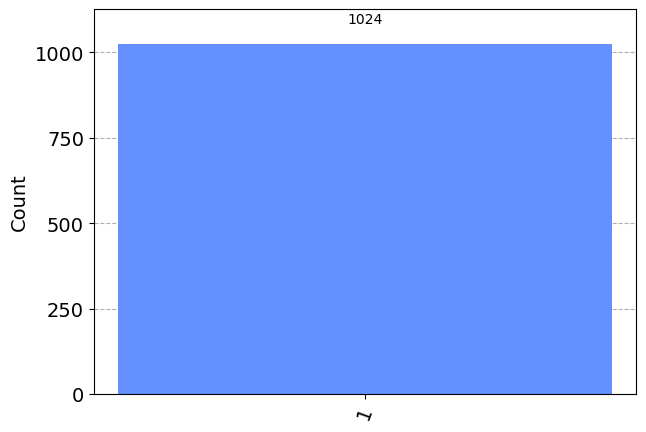

In [8]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

We can see that we (unsurprisingly) have a 100% chance of measuring $|1\rangle$. This time, let’s instead put our qubit into a superposition and see what happens. We will use the state $|q_0\rangle$ from earlier in this section:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

We need to add these amplitudes to a python list. To add a complex amplitude, Python uses `j` for the imaginary unit (we normally call it "$i$" mathematically):

In [9]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

And we then repeat the steps for initialising the qubit as before:

In [10]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


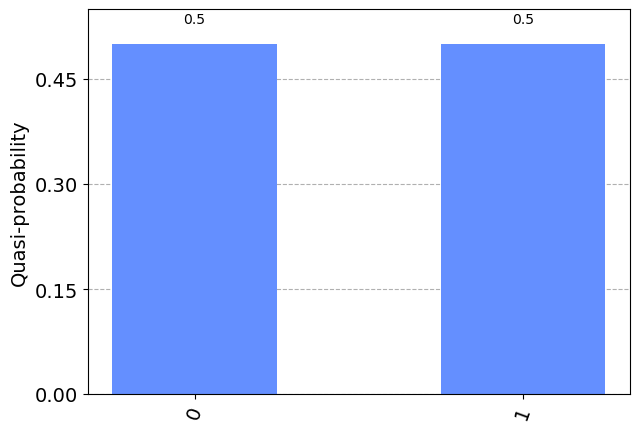

In [11]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

We can see we have equal probability of measuring either $|0\rangle$ or $|1\rangle$. 

##  1.1 Measurements and the Observer Effect

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

And find it in the state $|0\rangle$, if we measure again, there is a 100% chance of finding the qubit in the state $|0\rangle$. This means the act of measuring _changes_ the state of our qubits.

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

We sometimes refer to this as _collapsing_ the state of the qubit. It is a potent effect, and so one that must be used wisely. For example, were we to constantly measure each of our qubits to keep track of their value at each point in a computation, they would always simply be in a well-defined state of either $|0\rangle$ or $|1\rangle$. As such, they would be no different from classical bits and our computation could be easily replaced by a classical computation. To achieve truly quantum computation we must allow the qubits to explore more complex states. Measurements are therefore only used when we need to extract an output. This means that we often place all the measurements at the end of our quantum circuit. 

We can demonstrate this using Qiskit’s statevector simulator. Let's initialize a qubit in superposition:

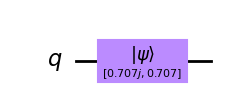

In [12]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

This should initialize our qubit in the state:

$$ |q\rangle = \tfrac{i}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle $$

We can verify this using the simulator:

In [13]:
qc.save_statevector()
result = sim.run(assemble(qc)).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


We can see here the qubit is initialized in the state `[0.+0.70710678j 0.70710678+0.j]`, which is the state we expected.

Let’s now create a circuit where we measure this qubit:

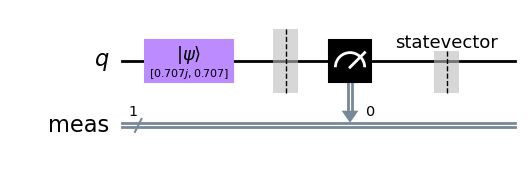

In [14]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw('mpl')

When we simulate this entire circuit, we can see that one of the amplitudes is _always_ 0:

In [15]:
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


You can re-run this cell a few times to reinitialize the qubit and measure it again. You will notice that either outcome is equally probable, but that the state of the qubit is never a superposition of $|0\rangle$ and $|1\rangle$. Somewhat interestingly, the global phase on the state $|0\rangle$ survives, but since this is global phase, we can never measure it on a real quantum computer.

### A Note about Quantum Simulators

We can see that writing down a qubit’s state requires keeping track of two complex numbers, but when using a real quantum computer we will only ever receive a yes-or-no (`0` or `1`) answer for each qubit. The output of a 10-qubit quantum computer will look like this:

`0110111110`

Just 10 bits, no superposition or complex amplitudes. When using a real quantum computer, we cannot see the states of our qubits mid-computation, as this would destroy them! This behaviour is not ideal for learning, so Qiskit provides different quantum simulators: By default, the `aer_simulator` mimics the execution of a real quantum computer, but will also allow you to peek at quantum states before measurement if we include certain instructions in our circuit. For example, here we have included the instruction `.save_statevector()`, which means we can use `.get_statevector()` on the result of the simulation. 

# 2. Single Qubit Gates

In [16]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

## 2.1 The Pauli Gates <a id="pauli"></a>
We will start here by undertanding how to put a Pauli gate in a quantum circuit.

### 2.1.1 The X-Gate <a id="xgate"></a>
The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

In Qiskit, we can create a short circuit to verify this:

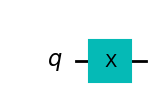

In [17]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

### 2.1.2 The Y & Z-gates  <a id="ynzgatez"></a>
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$


Below is a widget that displays a qubit’s state on the Bloch sphere, pressing one of the buttons will perform the gate on the qubit:

In [18]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

In Qiskit, we can apply the Y and Z-gates to our circuit using:

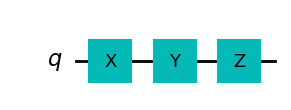

In [19]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw('mpl')

## 2.2 The Hadamard Gate  <a id="hgate"></a>

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

You can play around with these gates using the widget below:

In [20]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

## EXERCISE TO DO
1. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.
2. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).


#### Solution 1

In [21]:
from qiskit.quantum_info.operators import Operator 
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.extensions import XGate, HGate, ZGate
from qiskit import BasicAer, transpile
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.widgets import gate_demo


backend=BasicAer.get_backend('unitary_simulator')


qc_hzh = QuantumCircuit(1)

#HZH gate initialization
qc_hzh.h(0)  #H-gate
qc_hzh.z(0)  #Z-gate
qc_hzh.h(0)  #H-gate
qc_hzh.draw('mpl') 

routine_hzh = backend.run(transpile(qc_hzh, backend))
prod_hzh=routine_hzh.result().get_unitary(qc_hzh, decimals=3)

#X-gate Equivalent
qc_X = QuantumCircuit(1)

qc_X.x(0)  #X-gate
qc_X.draw('mpl')

routine_x = backend.run(transpile(qc_X, backend))
prod_x=routine_x.result().get_unitary(qc_X, decimals=3)

#Checking whether equivalent
compare=prod_hzh==prod_x
print("Result after applying HZH - Gate \n" , prod_hzh)
print("\nResult after applying X - Gate \n" ,prod_x)

is_equal=compare.all()

if(is_equal):
    print("\n")
    print("After comparing the gates, the result is:",is_equal)
    print("Hence, proved-> applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate")

Result after applying HZH - Gate 
 [[0.+0.j 1.-0.j]
 [1.-0.j 0.+0.j]]

Result after applying X - Gate 
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


After comparing the gates, the result is: True
Hence, proved-> applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate



#### Solution 2

In [22]:
qc_comb = QuantumCircuit(1)
qc_comb.x(0)  #X-gate
qc_comb.h(0)  #H-gate
qc_comb.z(0)  #Z-gate
qc_comb.h(0)  #H-gate


prod_xhzh = backend.run(transpile(qc_comb, backend))
r0=prod_xhzh.result().get_unitary(qc_comb, decimals=3)
print("XHZH - Gate \n" , r0)

qc_y = QuantumCircuit(1)
qc_y.y(0)  #y-gate

prod_y = backend.run(transpile(qc_y, backend))
r1=prod_y.result().get_unitary(qc_y, decimals=3)
print("\nY - Gate \n" , r1)

if(r0.all()==r1.all()):
    print("\nThis combination shows XHZH-gate == Y-gate")

XHZH - Gate 
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Y - Gate 
 [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

This combination shows XHZH-gate == Y-gate


## 2.3 The I, S and T-gates  <a id="istgates"></a>

### 2.3.1 The I-gate  <a id="igate"></a>

First comes the I-gate (‘Identity gate’). This is simply a gate that does nothing. Its matrix is the identity matrix:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

Applying the identity gate anywhere in your circuit should have no effect on the qubit state, so it’s interesting this is even considered a gate. There are two main reasons behind this, one is that it is often used in calculations, for example: proving the X-gate is its own inverse:

$$ I = XX $$

The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.



### 2.3.2 The S-gates  <a id="sgate"></a>

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate). It does a quarter-turn around the Bloch sphere. It is important to note the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).  

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$


To add an S-gate in Qiskit:

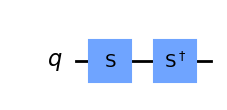

In [23]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw('mpl')

# 3. Multiple Qubits & Entangled States

We will now look at how we represent multiple qubits, and how these qubits can interact with each other. We have seen how we can represent the state of a qubit using a 2D-vector, now we will see how we can represent the state of multiple qubits.

A single bit has two possible states, and a qubit state has two complex amplitudes. Similarly, two bits have four possible states:

`00` `01` `10` `11`

To describe the state of two qubits requires four complex amplitudes. We store these amplitudes in a 4D-vector like so:

$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

If we have $n$ qubits, we will need to keep track of $2^n$ complex amplitudes. As we can see, these vectors grow exponentially with the number of qubits. This is the reason quantum computers with large numbers of qubits are so difficult to simulate. A modern laptop can easily simulate a general quantum state of around 20 qubits, but simulating 100 qubits is too difficult for the largest supercomputers.

Let's look at an example circuit:

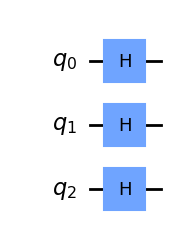

In [24]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

Each qubit is in the state $|+\rangle$, so we should see the vector:

$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [25]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

## 3.1 Single Qubit Gates on Multi-Qubit Statevectors <a id="single-qubit-gates"></a>

We have seen that an X-gate is represented by the matrix:

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

And that it acts on the state $|0\rangle$ as so:

$$
X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix}
$$

but it may not be clear how an X-gate would act on a qubit in a multi-qubit vector. Fortunately, the rule is quite simple; just as we used the kronecker product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors. For example, in the circuit below:

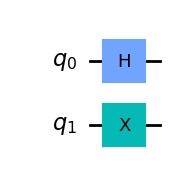

In [26]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

we can represent the simultaneous operations (H & X) using their kronecker product:

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

$$
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} 
$$

$$
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. This can become quite messy, you will often see the clearer notation:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

Instead of calculating this by hand, we can use Qiskit’s `aer_simulator` to calculate this for us. The Aer simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:

In [27]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

Then, the result is as follows:

In [28]:
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

If we want to apply a gate to only one qubit at a time (such as in the circuit below), we describe this using kronecker product with the identity matrix, e.g.:

$$ X \otimes I $$

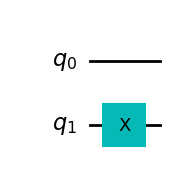

In [29]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

In [30]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

We can see Qiskit has performed the kronecker product:
$$
X \otimes I =
\begin{bmatrix} 0 & I \\
               I & 0\\
\end{bmatrix} = 
\begin{bmatrix} 0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                1 & 0 & 0 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

# EXERCISE TO DO

Calculate the single qubit unitary ($U$) created by the sequence of gates: $U = XZH$. Use Qiskit's Aer simulator to check your results.

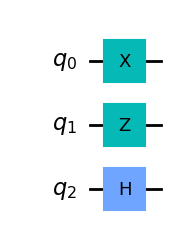

In [37]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.z(1)
circuit.h(2)
circuit.draw('mpl')

In [38]:
usim = Aer.get_backend('aer_simulator')
circuit.save_unitary()
qobj = assemble(circuit)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit U = }\n")

<IPython.core.display.Latex object>

## 3.2 Multi-Qubit Gates 

Now we know how to represent the state of multiple qubits, we are now ready to learn how qubits interact with each other. An important two-qubit gate is the CNOT-gate.

### 3.2.1 The CNOT-Gate 

This gate is a conditional gate that performs an X-gate on the second qubit (target), if the state of the first qubit (control) is $|1\rangle$. The gate is drawn on a circuit like this, with `q0` as the control and `q1` as the target:

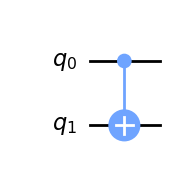

In [39]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')

When our qubits are not in superposition of $|0\rangle$ or $|1\rangle$ (behaving as classical bits), this gate is very simple and intuitive to understand. We can use the classical truth table:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

And acting on our 4D-statevector, it has one of the two matrices:

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

depending on which qubit is the control and which is the target. Different books, simulators and papers order their qubits differently. In our case, the left matrix corresponds to the CNOT in the circuit above. This matrix swaps the amplitudes of $|01\rangle$ and $|11\rangle$ in our statevector:

$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state $|+\rangle$:

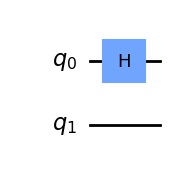

In [40]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [41]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

As expected, this produces the state $|0\rangle \otimes |{+}\rangle = |0{+}\rangle$:

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$

And let’s see what happens when we apply the CNOT gate:

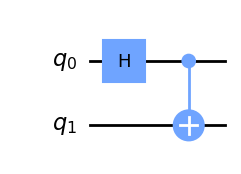

In [42]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [43]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

### 3.2 Entangled States <a id="entangled"></a>

We can observe that we have the state:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 
This state, which is known as a _Bell_ state, is very interesting as being _entangled._ 

We can see that this state has 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. Most interestingly, it has a **0%** chance of being measured in the states $|01\rangle$ or $|10\rangle$. We can see this in Qiskit:

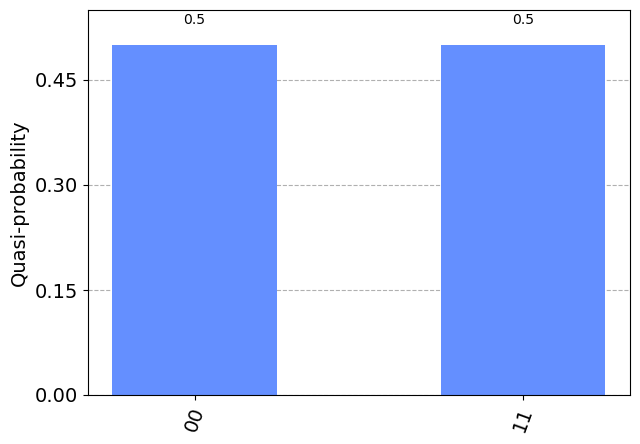

In [44]:
plot_histogram(result.get_counts())

This combined state cannot be written as two separate qubit states, which has interesting implications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state $|1\rangle$, the collective state of our qubits changes like so:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

Even if we separated these qubits light-years away, measuring one qubit collapses the superposition and appears to have an immediate effect on the other. Please refer to QUANTIS lecture for more details.

It’s important to note that the measurement result is random, and the measurement statistics of one qubit are **not** affected by any operation on the other qubit. Because of this, there is **no way** to use shared quantum states to communicate (no-communication theorem)

### 3.2.1 Visualizing Entangled States

We have seen that this state cannot be written as two separate qubit states, this also means we lose information when we try to plot our state on separate Bloch spheres:

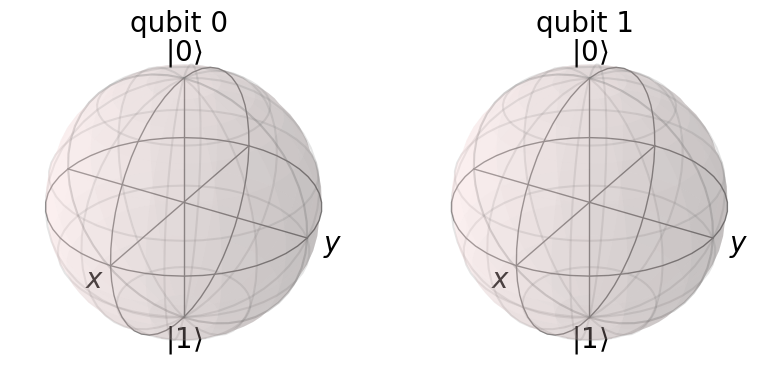

In [45]:
plot_bloch_multivector(final_state)

Given how we defined the Bloch sphere in the earlier chapters, it may not be clear how Qiskit even calculates the Bloch vectors with entangled qubits like this. In the single-qubit case, the position of the Bloch vector along an axis nicely corresponds to the expectation value of measuring in that basis. If we take this as _the_ rule of plotting Bloch vectors, we arrive at this conclusion above. This shows us there is _no_ single-qubit measurement basis for which a specific measurement is guaranteed. This contrasts with our single qubit states, in which we could always pick a single-qubit basis. Looking at the individual qubits in this way, we miss the important effect of correlation between the qubits. We cannot distinguish between different entangled states. For example, the two states:

$$\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \quad \text{and} \quad \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

will both look the same on these separate Bloch spheres, despite being very different states with different measurement outcomes.

How else could we visualize this statevector? This statevector is simply a collection of four amplitudes (complex numbers), and there are endless ways we can map this to an image. One such visualization is the _Q-sphere,_ here each amplitude is represented by a blob on the surface of a sphere. The size of the blob is proportional to the magnitude of the amplitude, and the colour is proportional to the phase of the amplitude. The amplitudes for $|00\rangle$ and $|11\rangle$ are equal, and all other amplitudes are 0:

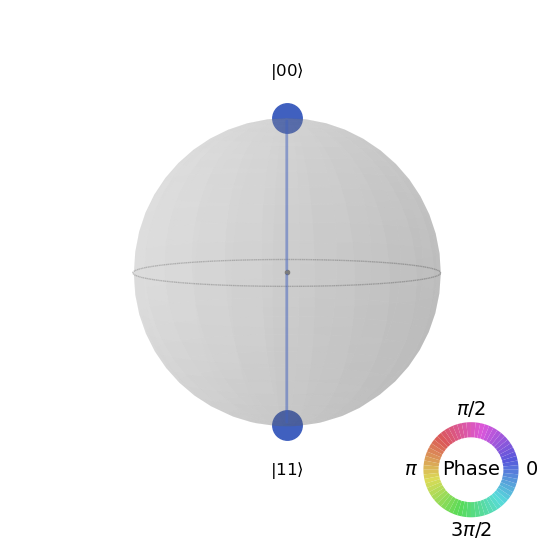

In [46]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

Here we can clearly see the correlation between the qubits. The Q-sphere's shape has no significance, it is simply a nice way of arranging our blobs; the number of `0`s in the state is proportional to the states position on the Z-axis, so here we can see the amplitude of $|00\rangle$ is at the top pole of the sphere, and the amplitude of $|11\rangle$ is at the bottom pole of the sphere.

# 4 Further Examples

We will provide below some examples on how to create, simulate, and visualize quantum circuits, as well as entangled bits.

## 4.1 Creating Superpositions of Qubits
We will now create a superposition of three Qubits:

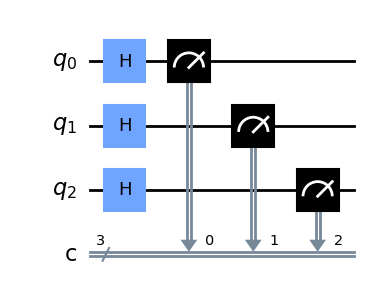

In [47]:
circ = QuantumCircuit(3,3)
circ.h(0)
circ.h(1)
circ.h(2)
for k in range(3):
    circ.measure(k,k)
circ.draw('mpl')# Run the code in this cell to see the widget

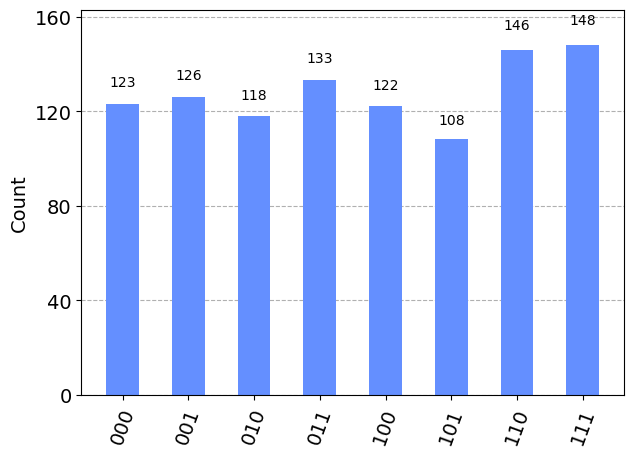

In [48]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ,backend,shots=1024)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

## 4.2 Building a simple Quantum Circuit

As we see before, the basic element needed for your first program is the QuantumCircuit. We begin by creating a QuantumCircuit comprised of three qubits.

In [49]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

After we create the circuit with its registers, we can add gates ("operations") to manipulate the registers. Below is an example of a quantum circuit that makes a three-qubit state (this is aka GHZ state)

$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}$.


To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. 
To make the GHZ state, we apply the following gates:
* A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
* A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
* A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

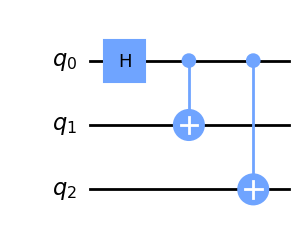

In [50]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)
# Visualize the Circuit using Qiskit QuantumCircuit.draw()
circ.draw('mpl')

### Note
In this circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

## Simulating circuits using Qiskit Aer

Qiskit Aer is our package for simulating quantum circuits. It provides many different backends for doing a simulation. There is also a basic, Python only, implementation called BasicAer (which can be used as a drop-in replacement for Aer)

Statevector backend

The most common backend in Qiskit Aer is the statevector_simulator. This simulator returns the quantum state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits (so be careful using this as it will quickly get too large to run on your machine).

To run the above circuit using the statevector simulator, first you need to import Aer and then set the backend to statevector_simulator. Once the backend has been chosen, it's time to compile and run the quantum circuit. In Qiskit we provide the execute function for this. execute returns a job object that encapsulates information about the job submitted to the backend.

When you run a program, a job object is made that has the following two useful methods: job.status() and job.result(), which return the status of the job and a result object, respectively.
Note: Jobs run asynchronously, but when the result method is called, it switches to synchronous and waits for it to finish before moving on to another task.

The results object contains the data and Qiskit provides the method result.get_statevector(circ) to return the state vector for the quantum circuit.

In [51]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution 
job = backend.run(circ)

result = job.result()

outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


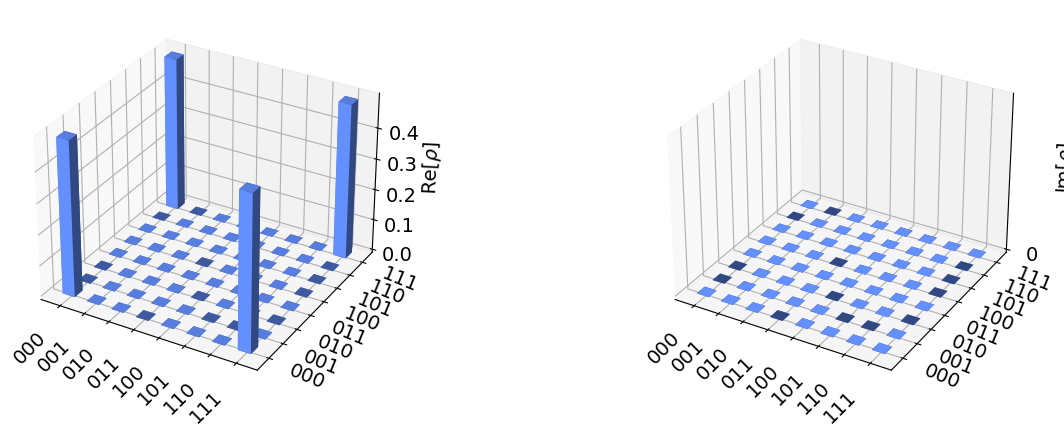

In [52]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

## 4.3 Creating an Entangled 3 Qubits

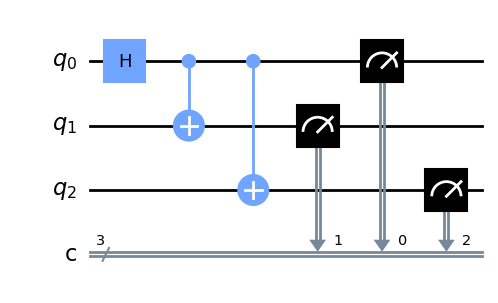

In [53]:
circ = QuantumCircuit(3,3)
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)
for i in range(3):
    circ.measure(i,i)
circ.draw('mpl')

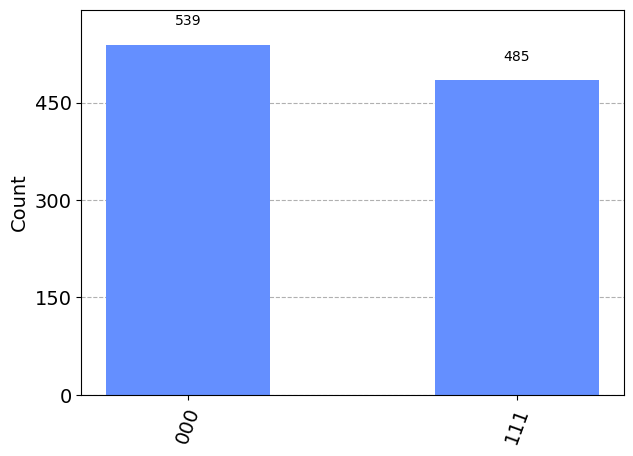

In [54]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ,backend,shots=1024)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

## 4.4 Creating a Pair of Entangled Qubits

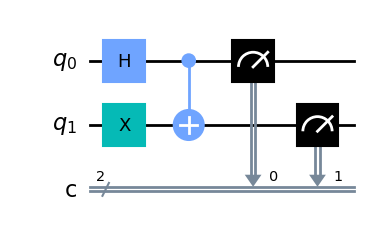

In [55]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.x(1)
circ.cx(0,1)
for i in range(2):
    circ.measure(i,i)
circ.draw('mpl')

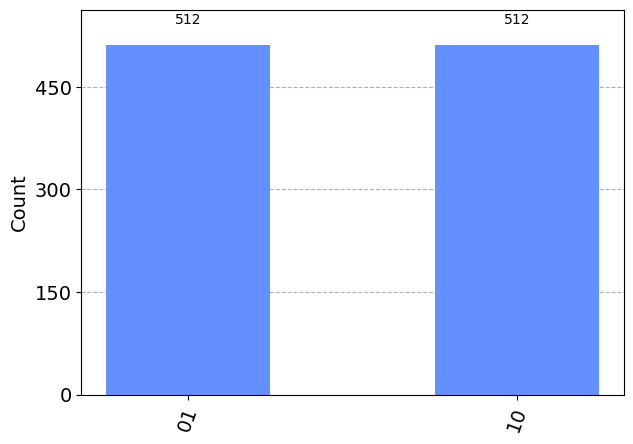

In [56]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ,backend,shots=1024)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)